In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
#In categorical columns mode is preferred over mean

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

# Data Manipulation

In [759]:
#Extract the 5th column and store it in customer_5

In [12]:
customer_5=df.iloc[:,4]      #Extracting by the index value

In [13]:
customer_6=df.loc[:,['Dependents']]      #Extracting by the column name

In [14]:
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [15]:
customer_51=df.iloc[:1000,4]  #The first 1000 columns

In [16]:
customer_51

0      No
1      No
2      No
3      No
4      No
       ..
995    No
996    No
997    No
998    No
999    No
Name: Dependents, Length: 1000, dtype: object

In [17]:
df['customer_5']=df.iloc[:,4]

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


In [19]:
#Extract the 15th column and store it in customer_15

In [20]:
customer_15=df.iloc[:,14]

In [769]:
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [770]:
#Extract all the male citizen wwhose payment method is electric and store the result in 'Senior_male_electronic'

In [771]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [772]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [773]:
df['PaymentMethod'].nunique()

4

In [774]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [775]:
Senior_male_electronic=df[(df['gender']=='Male') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Electronic check')]

In [776]:
Senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,No
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes,No
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No,Yes
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes,No
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes,No
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes,No


In [777]:
#Extract all those customer whose tenure iss greater than 70 month or their monthly charges is greater than 100$ and store in customer total tenure

In [778]:
customer_total_tenure=df[(df['tenure']>70) | (df['MonthlyCharges']>100)]

In [779]:
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,No
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Yes


In [780]:
two_mail_yes=df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]

In [781]:
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes,No
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes,Yes


In [782]:
#Choosing 333 random data

In [783]:
customer_333=df.sample(n=333)

In [784]:
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customer_5
6955,5392-AKEMH,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,45.05,523.1,No,No
1329,3910-MRQOY,Female,0,Yes,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.40,1496.45,No,No
6807,2030-BTZRO,Male,0,Yes,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.40,107.6,No,Yes
2354,9424-CMPOG,Male,0,Yes,Yes,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,197.4,No,Yes
3593,9540-JYROE,Male,0,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.10,551.35,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,6177-PEVRA,Female,0,No,No,48,Yes,No,DSL,Yes,...,No,No,No,Two year,No,Credit card (automatic),55.50,2627.35,No,No
675,3729-OWRVL,Male,1,No,No,65,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,110.35,7246.15,No,No
6946,9013-AQORL,Female,0,No,Yes,48,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,No,Yes
1617,4939-KYYPY,Male,0,No,No,27,Yes,Yes,DSL,No,...,Yes,No,No,Month-to-month,No,Electronic check,59.45,1611.65,No,No


In [785]:
#Count of different level of churn column

In [786]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data visualization

In [787]:
#Bar plot for internetservices column

In [788]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [789]:
x=df['InternetService'].value_counts().keys().to_list()

In [790]:
x

['Fiber optic', 'DSL', 'No']

In [791]:
y=df['InternetService'].value_counts().to_list()

In [792]:
y

[3096, 2421, 1526]

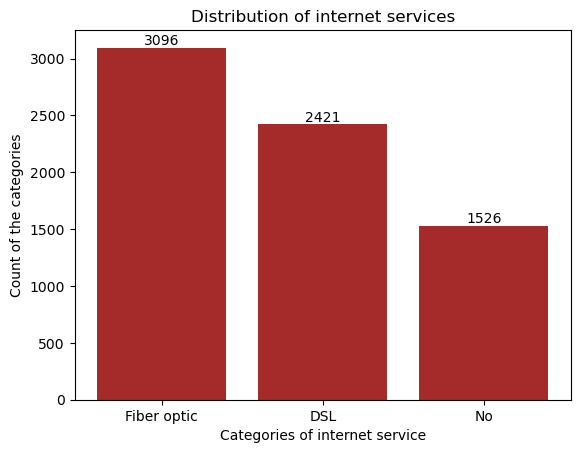

In [793]:
plt.bar(x,y,color='brown')
plt.xlabel("Categories of internet service")
plt.ylabel('Count of the categories')
plt.title('Distribution of internet services')
for i,v in enumerate(y):
    plt.text(i,v+1,str(v),ha='center',va='bottom')
plt.show()

In [794]:
#Plot a histogramfor tenure column

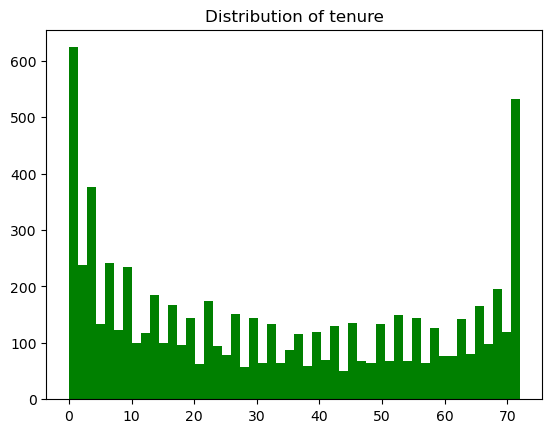

In [795]:
plt.hist(df['tenure'],bins=50,color='green',histtype='bar')   #Bins are intervals in which data is divided
plt.title('Distribution of tenure')
plt.show()

In [796]:
#Build a scatter plot between monthly charges(y axis) and tenure(x axis)

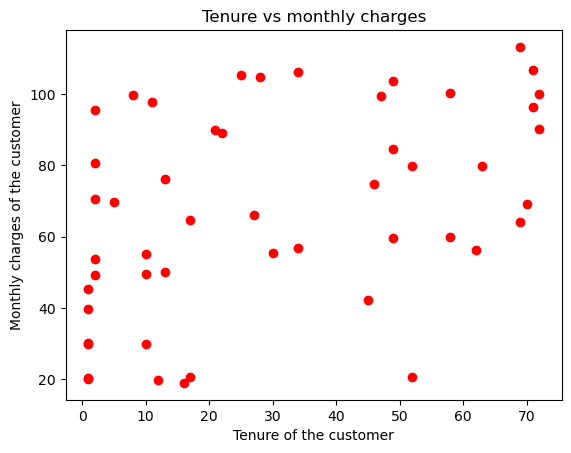

In [797]:
plt.scatter(x=df['tenure'].head(50),y=df['MonthlyCharges'].head(50),color='red')
plt.xlabel('Tenure of the customer')
plt.ylabel('Monthly charges of the customer')
plt.title('Tenure vs monthly charges')
plt.show()


In [798]:
#Build box plot between tenure(y axis) and contract(x axis)

<Axes: xlabel='Contract', ylabel='tenure'>

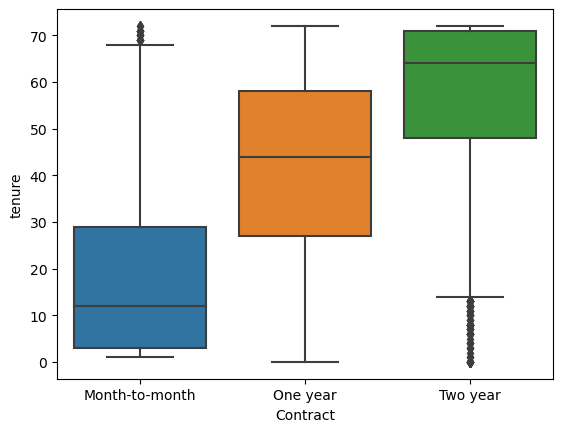

In [799]:
sns.boxplot(y=df['tenure'],x=df['Contract'])

# Model Building-Linear regression

In [800]:
# a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’

# i. Divide the dataset into train and test sets in 70:30 ratio.

# ii. Build the model on train set and predict the values on test set

# iii. After predicting the values, find the root mean square error

# iv. Find out the error in prediction & store the result in ‘error’

# v. Find the root mean square error

In [801]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [802]:
x=df.loc[:,['tenure']].values

In [803]:
x

array([[ 1],
       [34],
       [ 2],
       ...,
       [11],
       [ 4],
       [66]], dtype=int64)

In [804]:
y=df.loc[:,['MonthlyCharges']].values

In [805]:
y

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [806]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [807]:
x_train

array([[ 9],
       [14],
       [64],
       ...,
       [58],
       [ 1],
       [ 4]], dtype=int64)

In [808]:
from sklearn.linear_model import LinearRegression

In [809]:
l_reg=LinearRegression()

In [810]:
l_reg.fit(x_train,y_train)

LinearRegression()

In [811]:
y_pred=l_reg.predict(x_test)

In [812]:
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

# Find error

In [813]:
from sklearn.metrics import mean_squared_error,r2_score

In [814]:
mse=mean_squared_error(y_test,y_pred)

In [815]:
mse

864.0415701364655

In [816]:
rmse=np.sqrt(mse)

In [817]:
rmse

29.394584027273893

In [818]:
r2=r2_score(y_test,y_pred)

In [819]:
r2

0.069470028128085

In [820]:
print(f"{round(r2*100,2)}%")

6.95%


In [821]:
r2_percent=f'{r2 : .2%}'        # f"{your_number:.0%}"

In [822]:
r2_percent

' 6.95%'

#  Logistic Regression

In [823]:
# a. Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’

# i. Divide the dataset in 65:35 ratio

# ii. Build the model on train set and predict the values on test set

# iii. Build the confusion matrix and get the accuracy score

In [824]:
x1=df.loc[:,['MonthlyCharges']].values

In [825]:
x1

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [826]:
y1=df.loc[:,['Churn']].values

In [827]:
y1

array([['No'],
       ['No'],
       ['Yes'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [828]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.35,random_state=0)

In [829]:
from sklearn.linear_model import LogisticRegression

In [830]:
lo_reg=LogisticRegression()

In [831]:
lo_reg.fit(x1_test,y1_test)

C:\Users\Atreyee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [832]:
y1_pred=lo_reg.predict(x1_test)

In [833]:
y1_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [834]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [835]:
confusion_matrix(y1_test,y1_pred)

array([[1815,    0],
       [ 651,    0]], dtype=int64)

In [836]:
a=accuracy_score(y1_test,y1_pred)

In [837]:
a

0.7360097323600974

In [838]:
lo_percent=f'{a : .2%}'

In [839]:
lo_percent

' 73.60%'

In [840]:
c_rep=classification_report(y1_test,y1_pred)

C:\Users\Atreyee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atreyee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Atreyee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [841]:
print(c_rep)

              precision    recall  f1-score   support

          No       0.74      1.00      0.85      1815
         Yes       0.00      0.00      0.00       651

    accuracy                           0.74      2466
   macro avg       0.37      0.50      0.42      2466
weighted avg       0.54      0.74      0.62      2466



# Multiple Logistic regression

In [842]:
# b. Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’

# i. Divide the dataset in 80:20 ratio

# ii. Build the model on train set and predict the values on test set

# iii. Build the confusion matrix and get the accuracy score

In [843]:
x2=df.loc[:,['MonthlyCharges','tenure']].values

In [844]:
x2

array([[ 29.85,   1.  ],
       [ 56.95,  34.  ],
       [ 53.85,   2.  ],
       ...,
       [ 29.6 ,  11.  ],
       [ 74.4 ,   4.  ],
       [105.65,  66.  ]])

In [845]:
y2=df.loc[:,['Churn']].values

In [846]:
y2

array([['No'],
       ['No'],
       ['Yes'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [847]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.20,random_state=0)

In [848]:
mlogreg=LogisticRegression()

In [849]:
mlogreg.fit(x2_train,y2_train)

C:\Users\Atreyee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [850]:
y2_pred=mlogreg.predict(x2_test)

In [851]:
y2_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [852]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [853]:
confusion_matrix(y2_test,y2_pred)

array([[934, 107],
       [212, 156]], dtype=int64)

In [854]:
a2=accuracy_score(y2_test,y2_pred)

In [855]:
a2

0.7735982966643009

In [856]:
mlogper=f"{a2:.2%}"

In [857]:
mlogper

'77.36%'

In [858]:
c_rep1=classification_report(y2_test,y2_pred)

In [859]:
print(c_rep1)

              precision    recall  f1-score   support

          No       0.82      0.90      0.85      1041
         Yes       0.59      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



# Decision tree

In [860]:
# a. Build a decision tree model where dependent variable is ‘Churn’ & independent
# variable is ‘tenure’

# i. Divide the dataset in 80:20 ratio


# ii. Build the model on train set and predict the values on test set

# iii. Build the confusion matrix and calculate the accuracy

In [861]:
x3=df.loc[:,['tenure']].values

In [862]:
x3

array([[ 1],
       [34],
       [ 2],
       ...,
       [11],
       [ 4],
       [66]], dtype=int64)

In [863]:
y3=df.loc[:,['Churn']].values
y3

array([['No'],
       ['No'],
       ['Yes'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [864]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.20,random_state=0)

In [865]:
from sklearn.tree import DecisionTreeClassifier

In [866]:
d_tree=DecisionTreeClassifier()

In [867]:
d_tree.fit(x3_train,y3_train)

DecisionTreeClassifier()

In [868]:
y3_pred=d_tree.predict(x3_test)

In [869]:
y3_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [870]:
a3=accuracy_score(y3_test,y3_pred)

In [871]:
a3

0.7466288147622427

In [872]:
confusion_matrix(y3_test,y3_pred)

array([[965,  76],
       [281,  87]], dtype=int64)

In [873]:
c_rep2=classification_report(y3_test,y3_pred)

In [874]:
print(c_rep2)

              precision    recall  f1-score   support

          No       0.77      0.93      0.84      1041
         Yes       0.53      0.24      0.33       368

    accuracy                           0.75      1409
   macro avg       0.65      0.58      0.59      1409
weighted avg       0.71      0.75      0.71      1409



# Random Forest

In [875]:
# a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
# variables are ‘tenure’ and ‘MonthlyCharges’

# i. Divide the dataset in 70:30 ratio

# ii. Build the model on train set and predict the values on test set

# iii. Build the confusion matrix and calculate the accuracy

In [876]:
x4=df.loc[:,['MonthlyCharges','tenure']].values

In [877]:
x4

array([[ 29.85,   1.  ],
       [ 56.95,  34.  ],
       [ 53.85,   2.  ],
       ...,
       [ 29.6 ,  11.  ],
       [ 74.4 ,   4.  ],
       [105.65,  66.  ]])

In [878]:
y4=df.loc[:,['Churn']].values
y4

array([['No'],
       ['No'],
       ['Yes'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [879]:
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.30,random_state=3)

In [880]:
print(x4_train)

[[ 81.65  45.  ]
 [ 39.    16.  ]
 [ 64.1   40.  ]
 ...
 [ 25.55  64.  ]
 [ 20.15  40.  ]
 [105.2   42.  ]]


In [881]:
from sklearn.ensemble import RandomForestClassifier

In [882]:
r_forest=RandomForestClassifier()

In [883]:
r_forest.fit(x4_train,y4_train)

C:\Users\Atreyee\AppData\Local\Temp\ipykernel_10124\2558294750.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_forest.fit(x4_train,y4_train)


RandomForestClassifier()

In [884]:
y4_pred=r_forest.predict(x4_test)

In [885]:
y4_pred

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [886]:
a4=accuracy_score(y4_test,y4_pred)

In [887]:
a4

0.7524846190250828

In [888]:
a2_per=f"{a4:.2%}"

In [889]:
a2_per

'75.25%'

In [890]:
confusion_matrix(y4_test,y4_pred)

array([[1341,  227],
       [ 296,  249]], dtype=int64)

In [891]:
c_rep3=classification_report(y4_test,y4_pred)

In [892]:
print(c_rep3)

              precision    recall  f1-score   support

          No       0.82      0.86      0.84      1568
         Yes       0.52      0.46      0.49       545

    accuracy                           0.75      2113
   macro avg       0.67      0.66      0.66      2113
weighted avg       0.74      0.75      0.75      2113

